<a href="https://colab.research.google.com/github/RayMelgares/Math-152/blob/main/Random_Walk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Introduction

This project will explore two main variations of a 'random walk'. The first will have two walkers moving randomly in four possible directions: up, down , left, right, with equal probablity. The two walkers will also be confined into a set square of a certain length, and will stop when they collide. The results will be a plot of this walk and showcase its structure, in which we will see that walkers have a tendency to either collide quickly or slowly. The second walk will be using PIL, and show various walkers with different downward biases, a kind of "gravity". This walk will showcase both how sensitive a random walk is to biases and also how a walk can create an "atmospheric" effect.

###2-Dimensional 2-Walker(Matplot)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

This is the code to create to 'people' walking on a grid who can not occupy the same space at the same time.

This code defines a function named step_with_lim with the purpose of simulating the movement of a particle or an object within a square or a box with edge length lim. The function returns the new coordinates of the object after the movement.

The function begins by creating a copy of the coords parameter using coords[:]. This is done to prevent changes to the original coords.
Next, the function randomly selects either 0 or 1 using np.random.choice([0,1]) to determine the index of the coordinate to be modified. If 0 is selected, the object moves up or down, and if 1 is selected, it moves left or right.
The current coordinate value of the randomly selected index is obtained and stored in current_value.

If the absolute value of the current coordinate is equal to lim, the object is at the edge of the square or the box, and it cannot move beyond that limit. In this case, the function modifies the coordinate value such that the object moves randomly in the opposite direction to its current position.

If the absolute value of the current coordinate is less than lim, the object is in the interior of the square, and it can move randomly in either direction. The function modifies the coordinate value to move the object one unit up or down or left or right.

Finally, the function returns the new coordinates of the object after the movement.


In [ ]:
def step_with_lim(coords, lim): # a step function that bounds "movement"
  coords_copy = coords[:]
  # move either up-down or left-right
  index = np.random.choice([0,1])
  current_value = coords[index]
  # step in or don't move if we are at the edge of the box/square
  if abs(coords[index]) == lim:
    coords_copy[index] -= (current_value // abs(current_value)) * np.random.choice([0, 1])
  # move like normal in the interior of the square
  else:
    coords_copy[index] += np.random.choice([-1, 1])
  return coords_copy

This code defines a function called two_walker_collision_walk that takes three arguments: pair_of_walkers, limit, and iterations.

The pair_of_walkers argument is expected to be a 3D numpy array of shape (iterations+1, 2, 2), representing the locations of two walkers on a 2D plane at each iteration. 

The limit argument is an integer that represents the maximum distance a walker can move in a single step.

The iterations argument is an integer that represents the maximum number of iterations the walkers will take.

The function initializes two walkers person_1 and person_2 at [0,0] and sets steps_taken to 0. It then enters a loop that iterates iterations times, updating the pair_of_walkers array at each iteration with the current location of the two walkers.

On each iteration, the function calls a step_with_lim function with the current location of person_1 and person_2 and the limit argument to move them to a new location. If the two walkers are at the same location after the step, the function updates the pair_of_walkers array with their final positions and sets steps_taken to the current iteration. It then breaks out of the loop.

Finally, the function returns the updated pair_of_walkers array and the number of steps taken (steps_taken).


In [ ]:
def two_walker_collision_walk(pair_of_walkers, limit, iterations):
  person_1 = [0,0]
  person_2 = [0,0]
  steps_taken = 0

  # limit steps so we aren't waiting forever
  for t in range(iterations):
      pair_of_walkers[t, 0, 0], pair_of_walkers[t, 0, 1] = person_1[0], person_1[1]
      pair_of_walkers[t, 1, 0], pair_of_walkers[t, 1, 1] = person_2[0], person_2[1]

      # take one step to new location
      person_1 = step_with_lim(person_1, lim)
      person_2 = step_with_lim(person_2, lim)

      # if at the same location, update path and break out of loop
      if person_1 == person_2:
        pair_of_walkers[t+1, 0, 0], pair_of_walkers[t+1, 0, 1] = person_1[0], person_1[1]
        pair_of_walkers[t+1, 1, 0], pair_of_walkers[t+1, 1, 1] = person_2[0], person_2[1]
        steps_taken = t
        break
  
  return pair_of_walkers, steps_taken

This code sets the number of steps to 250 then sets the number of sets of walkers to 4 using the variable sets_of_walkers.

It initializes an empty list called walkers and a list of zeros called steps_count with length 4. It sets the lim variable to 3.

It then enters a for loop that iterates over the range of sets_of_walkers. In each iteration, it appends a numpy array of shape (steps+1, 2, 2) filled with zeros to the walkers list.

It calls the function two_walker_collision_walk with the current walker set, lim, and steps as arguments. It updates the current walker set and the number of steps taken by that set in the walkers list and steps_count list, respectively.

After the for loop, it prints out the steps_count list, which contains the number of steps taken for each of the four sets of walkers.


In [ ]:
steps = 250

sets_of_walkers = 4
walkers = []
steps_count = [0] * 4
lim = 3

for i in range(sets_of_walkers):
  walkers.append(np.zeros((steps + 1, 2, 2)))
  walkers[i], steps_count[i] = two_walker_collision_walk(walkers[i], lim, steps)

print(steps_count)

[12, 2, 1, 47]


In [ ]:
most_steps_taken = max(steps_count)

This code creates a 2x2 grid of subplots and sets the height and width of the figure to 12 using the set_figheight and set_figwidth methods of the figure object.

It then creates a list of the subplots called axs. It sets the x and y axis ticks using the set_xticks and set_yticks methods of each subplot with ticks and minor_ticks variables, which were previously defined using numpy.arange.

In a loop that iterates over the sets_of_walkers (which was defined previously), it sets the subplot's title to "Walking Pair i+1" where i is the index of the current iteration. It plots the x and y coordinates of the first and second walkers and also plots the last position of each walker.

It sets the x and y labels of the subplot to "$x$" and "$y$". It also sets the subplot's grid and padding using the grid and tight_layout methods of the matplotlib.pyplot library.

Finally, it shows the plot using the show method of the matplotlib.pyplot library.


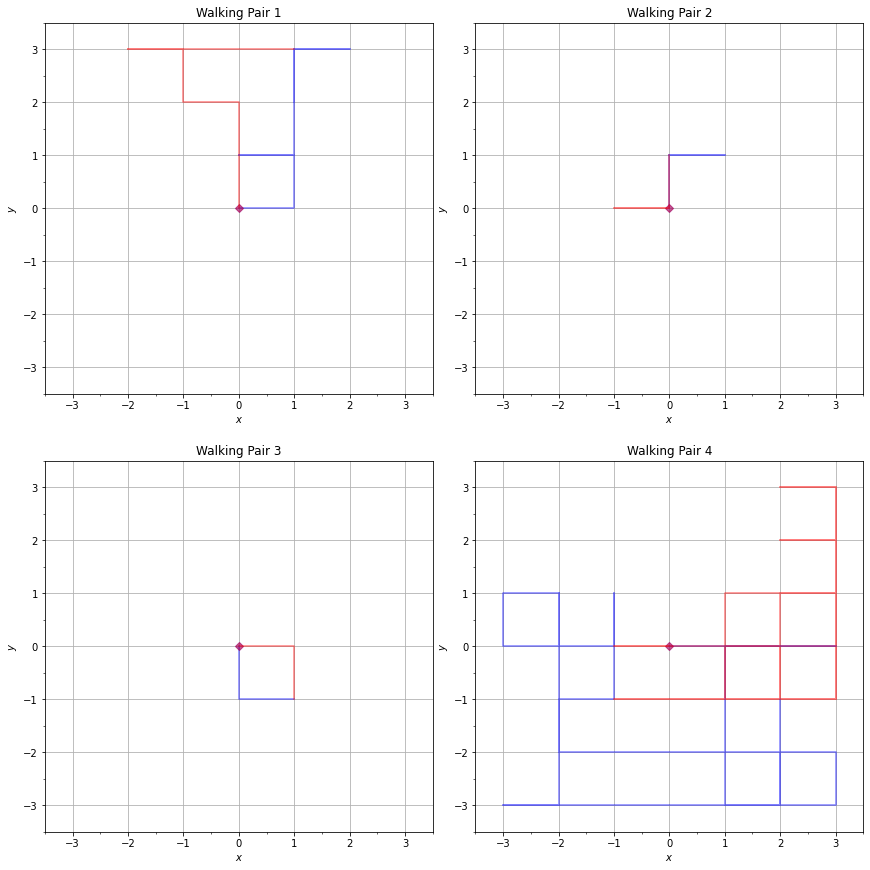

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(12)
fig.set_figwidth(12)
axs = [ax1, ax2, ax3, ax4]
ticks = np.arange(-3, 4, 1)
minor_ticks = np.arange(-3.5, 4, .5)
for i in range(sets_of_walkers):
  axs[i].title.set_text(f"Walking Pair {i + 1}")
  axs[i].plot(walkers[i][:steps_count[i]+2, 0, 0], walkers[i][:steps_count[i]+2, 0, 1], alpha=0.5, c='blue')
  axs[i].plot(walkers[i][-1, 0, 0], walkers[i][-1, 0, 1], alpha=.4, c='blue', marker='D')
  axs[i].plot(walkers[i][:steps_count[i]+2, 1, 0], walkers[i][:steps_count[i]+2, 1, 1], alpha=0.5, c='red')
  axs[i].plot(walkers[i][-1, 1, 0], walkers[i][-1, 1, 1], alpha=.4, c='red', marker='D')
  axs[i].set_xticks(ticks)
  axs[i].set_xticks(minor_ticks, minor=True)
  axs[i].set_yticks(ticks)
  axs[i].set_yticks(minor_ticks, minor=True)
  axs[i].set_xlabel('$x$')
  axs[i].set_ylabel('$y$')
  axs[i].grid()

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2)

plt.show()

This plot shows the structure of the 2-person random walk with 4 plots showing 4 runs of the walk. Immediately what is noticeable is that the two walkers can collide and often do in just a few steps. This makes sense mathematically as they start at the same point so the probability that they collide is going to be high. We can also see how once the two walkers "escape" each other they tend to go their seperate ways and take significantly longer to collide again. This shows how two particles or objects are either likely to meet shortly after their seperation or long after, with little in-between. Whether it be particles in a physics sense, or two people walking about. 

This code simulates two walkers moving randomly within a 2D space with a defined bound. The number of pairs of walkers is set to 1000, and the size of the 2D space is defined by the 'bounds' variable, which is set to 3.

In the for loop, potential x and y steps are created for each walker, with either a positive or negative step chosen randomly using np.random.choice(). The axis of movement is also randomly chosen for each walker.

The code then checks if the potential movement would take the walkers out of bounds. If not, the walker's position is updated with the new position.

The code also checks if the two walkers are at the same location, and if so, stores the time taken to reach this position. The variable 'store_same_location_times' is initialized to all zeros and has the same length as the number of pairs of walkers. If two walkers are at the same location and the time has not been previously stored, the time is stored in 'store_same_location_times'.

The simulation runs for 1000 time steps, and the 'store_same_location_times' array is returned for the first ten pairs of walkers.


In [ ]:
# compute two walker collisions with ??? bounds
pairs_of_walkers = 1000
walkers = np.zeros((pairs_of_walkers, 2, 2))
options = [[0, 1], [0, -1], [1, 0], [-1, 0]]
bounds = 3

store_same_location_times = np.zeros((pairs_of_walkers))

for t in range(1000):
  # create potential x and y steps
  first_walker_step = np.random.choice([-1, 1], (pairs_of_walkers, 2))
  second_walker_step = np.random.choice([-1, 1], (pairs_of_walkers, 2))

  # create inverse arrays so that an exclusively x or exclusively y step can be taken
  axis = np.random.choice([0, 1], (pairs_of_walkers))
  axis_inv = np.invert(axis)
  axis2 = np.random.choice([0, 1], (pairs_of_walkers))
  axis_inv2 = np.invert(axis2)

  # check if step goes out of bounds, there has to be a better way than this
  check_if_oob_walker_1_x = (walkers[:, 0, 0] + (axis * first_walker_step[:, 0]) > bounds)
  check_if_oob_walker_1_x += (walkers[:, 0, 0] + (axis * first_walker_step[:, 0]) < -bounds)
  check_if_oob_walker_1_y = (walkers[:, 0, 1] + axis_inv * first_walker_step[:, 1] > bounds)
  check_if_oob_walker_1_y += (walkers[:, 0, 1] + axis_inv * first_walker_step[:, 1] < -bounds)
  check_if_oob_walker_2_x = (walkers[:, 1, 0] + (axis * second_walker_step[:, 0]) > bounds)
  check_if_oob_walker_2_x += (walkers[:, 1, 0] + (axis * second_walker_step[:, 0]) < -bounds)
  check_if_oob_walker_2_y = (walkers[:, 1, 1] + axis_inv * second_walker_step[:, 1] > bounds)
  check_if_oob_walker_2_y += (walkers[:, 1, 1] + axis_inv * second_walker_step[:, 1] < -bounds)

  # implement a step if the walker is within bounds and we've determined whether to move in the x and y direction
  walkers[:, 0, 0] += (np.invert(check_if_oob_walker_1_x) * axis * first_walker_step[:, 0])
  walkers[:, 0, 1] += (np.invert(check_if_oob_walker_1_y) * axis_inv * first_walker_step[:, 1])
  walkers[:, 1, 0] += (np.invert(check_if_oob_walker_2_x) * axis2 * second_walker_step[:, 0])
  walkers[:, 1, 1] += (np.invert(check_if_oob_walker_2_y) * axis_inv2 * second_walker_step[:, 1])

  # check if walkers are at same location and store time taken to reach collision
  same_x = (walkers[:, 0, 0] == walkers[:, 1, 0])
  same_y = (walkers[:, 0, 1] == walkers[:, 1, 1])
  not_set_same_location_times = (store_same_location_times == 0)
  store_same_location_times += not_set_same_location_times * same_x * same_y * (t + 1)

store_same_location_times[:10]


array([  1.,  19.,  45.,  32., 122.,  74., 219.,   1., 134.,   2.])

This showcases our discussion about the distribution of walk-steps, the numbers are either quite small or quite large. We can compute the average time as an interesting side note before moving on,

In [ ]:
np.mean(store_same_location_times)

69.654

The average appears to be a little less than double the area, quite interesting!

###GIF(BONUS)

In [ ]:
import imageio

In [ ]:
import os

In [ ]:
filenames = [''] * (most_steps_taken + 11)

for j in range(most_steps_taken + 1):
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
  fig.set_figheight(12)
  fig.set_figwidth(12)
  axs = [ax1, ax2, ax3, ax4]
  ticks = np.arange(-3, 4, 1)
  minor_ticks = np.arange(-3.5, 4, .5)
  for i in range(sets_of_walkers):
    axs[i].title.set_text(f"Walking Pair {i + 1}")
    axs[i].plot(walkers[i][:min(j+2, steps_count[i]), 0, 0], walkers[i][:min(j+2, steps_count[i]), 0, 1], alpha=0.5, c='blue')
    axs[i].plot(walkers[i][min(j+1, steps_count[i]-1), 0, 0], walkers[i][min(j+1, steps_count[i]-1), 0, 1], alpha=.4, c='blue', marker='D')
    axs[i].plot(walkers[i][:min(j+2, steps_count[i]), 1, 0], walkers[i][:min(j+2, steps_count[i]), 1, 1], alpha=0.5, c='red')
    axs[i].plot(walkers[i][min(j+1, steps_count[i]-1), 1, 0], walkers[i][min(j+1, steps_count[i]-1), 1, 1], alpha=.4, c='red', marker='D')
    axs[i].set_xticks(ticks)
    axs[i].set_xticks(minor_ticks, minor=True)
    axs[i].set_yticks(ticks)
    axs[i].set_yticks(minor_ticks, minor=True)
    axs[i].set_xlabel('$x$')
    axs[i].set_ylabel('$y$')
    axs[i].grid()


  filename = f'{j}.png'
  filenames[j] = filename

  if j == most_steps_taken:
    for x in range(1, 11):
      filenames[most_steps_taken + x] = filename

  plt.savefig(filename)
  plt.close()

with imageio.get_writer('two_walker.gif', mode='I') as writer:
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)

for filename in set(filenames):
  os.remove(filename)


In [ ]:
from IPython.display import Image as img

In [ ]:
!wget /content/two_walker.gif

/content/two_walker.gif: Scheme missing.


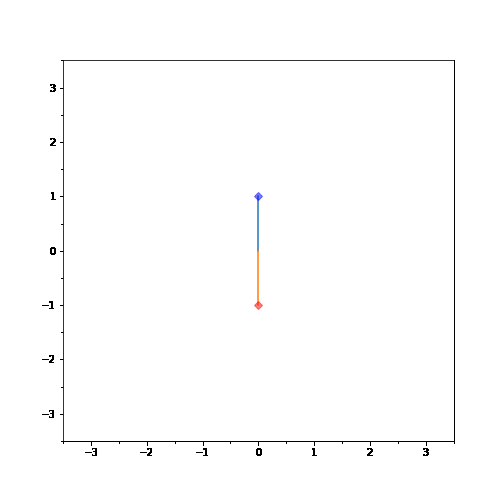

In [ ]:
img(open('two_walker.gif','rb').read())

This code generates a GIF animation from a set of PNG images. The PNG images are generated using matplotlib to plot the movements of two walkers in a 2D space.

The first line creates an empty list called "filenames" with length equal to the value of "steps_taken" plus 11. Then, a for loop is run "steps_taken" times. In each iteration of the loop, a new plot is generated with the current positions of the two walkers. These positions are plotted using the x and y coordinates of two lists, "xlist_p1" and "ylist_p1" for the first walker, and "xlist_p2" and "ylist_p2" for the second walker. A blue diamond-shaped marker is plotted at the current position of the first walker, and a red diamond-shaped marker is plotted at the current position of the second walker.


###Bot Walk(PIL)

In [ ]:
from PIL import Image, ImageDraw

In [ ]:
num_bots = 100000

Can change the number of bot groups. If you want manual colors and starting points uncomment and set them.

In [ ]:
# Set the number of bot groups we want
number_of_bot_groups = 3
# set colors manually by uncommenting, need an array for each bot group
# colors = [[0,255,0], [255,0,0]]
# set colors randomly
colors = np.random.randint(0, 255, (number_of_bot_groups, 3))
# the array containing all bot groups
all_bots = []
# the array containing all biases correlated to bot groups ie bias[0]['x'] is
# the x bias for bot group all_bots[0]
bias = []

# bottom limit that walk cannot exceed
bot_limit = 0

# to set different starting points for the bot groups, uncomment (1a)s, comment (1b)s
# bot_groups_starting = [[20,0], [40,0]] # 1a

for i in range(number_of_bot_groups):
  #add bot groups and bias
  all_bots.append(np.zeros((num_bots, 2)))
  bias.append({'x':0, 'y':0})
  # set initial starting point for all bot groups
  all_bots[i] += [20,0] #1b
  # set initial starting point for all_bots[i]
  # all_bots[i] += bot_groups_starting[i] # 1a

This code sets up a lot for later blocks of code, including the array for bias, colors, and starting points of the different bots.

Remember: X and Y are swapped

In [ ]:
# set bias for each bot group
# set x bias for group at 0 index or first group
bias[0]['x'] = -.2
# bias[0]['y'] = -1
# set x bias for group at 1 index or second group
bias[1]['x'] = -.2
# bias[1]['y'] = -1

This code actually sets the bias for the inividual bots. Three different biases were chosen to more easily view the effects of the bias. 

In [ ]:
def step_bots_with_bot_lim_and_bias(bots_arr, bot_lim, x_bias, y_bias):
  # calculate x and y steps with their respective biases
  step_x = np.random.uniform(-1 + x_bias, 1 + x_bias, (np.shape(bots_arr)[0]))
  step_y = np.random.uniform(-1 + y_bias, 1 + y_bias, (np.shape(bots_arr)[0]))
  # combine the x and y steps into a single step array
  step = np.zeros((np.shape(bots_arr)[0], 2))
  step[:, 0], step[:, 1] = step_x, step_y
  bots_arr += step
  # create array checking if array value is above bot_lim
  is_above = (bots_arr[:, 0] > bot_lim)
  # set array values that are below bot lim to 0 and ignore others
  bots_arr[:, 0] = (is_above * bots_arr[:, 0])
  return bots_arr

This code defines a function called step_bots_with_bot_lim_and_bias that takes four parameters:

bots_arr: a numpy array representing the positions of a group of bots.
bot_lim: a scalar representing a bottom limit that a bot's position cannot go below.
x_bias: a scalar representing a bias value that is added to the x-coordinate of each bot's position after each step.
y_bias: a scalar representing a bias value that is added to the y-coordinate of each bot's position after each step.
Within the function, the x and y steps for each bot are calculated using np.random.uniform, and the biases are added to them. The x and y steps are then combined into a single step array. The position of each bot is updated by adding the step to the current position.

If a bot's x-coordinate is above the bot_lim, its x-coordinate is set to 0. Finally, the updated bots_arr is returned.


In [ ]:
# iterate time while stepping each bot group
for t in range(1000):
  for i in range(number_of_bot_groups):
    all_bots[i] = step_bots_with_bot_lim_and_bias(all_bots[i], bot_limit, bias[i]['x'], bias[i]['y'])

The updated positions of each bot group are then stored back into the all_bots array. This process is repeated for all bot groups for the specified number of time steps.

Reduce the x, y coordinates of the image by changing range=[[x_min, x_max], [y_min, y_max]] in the histogram2d function.

In [ ]:
all_pixels = []
for i in range(number_of_bot_groups):
  # create 2d histogram to be canvas of a bot group
  counts = np.histogram2d(all_bots[i][:, 0], all_bots[i][:, 1], bins=2000, range=[[0,200], [-100,100]])[0]
  pixels = np.zeros((np.shape(counts)[0], np.shape(counts)[1], 3))
  # set the color of the bot group
  pixels[:,:,0] = counts[:, :] * colors[i][0]
  pixels[:,:,1] = counts[:, :] * colors[i][1]
  pixels[:,:,2] = counts[:, :] * colors[i][2]
  pixels = pixels.astype(np.uint8)

  # add the colored bot group to our array of all colored bot groups
  all_pixels.append(pixels)

This code creates a visualization of the movement of the bot groups via histogram of the positions of the bots in each group. The histogram is then converted into a colored image.

The code iterates through each bot group and creates a histogram of the bot positions using the np.histogram2d function. It then creates a blank image of the same size as the histogram, with three color channels (red, green, blue). The pixel values are set based on the histogram counts and the color of the bot group. Finally, the colored image is added to a list all_pixels which contains all of the colored bot groups.


And this code actually displays the histogram.

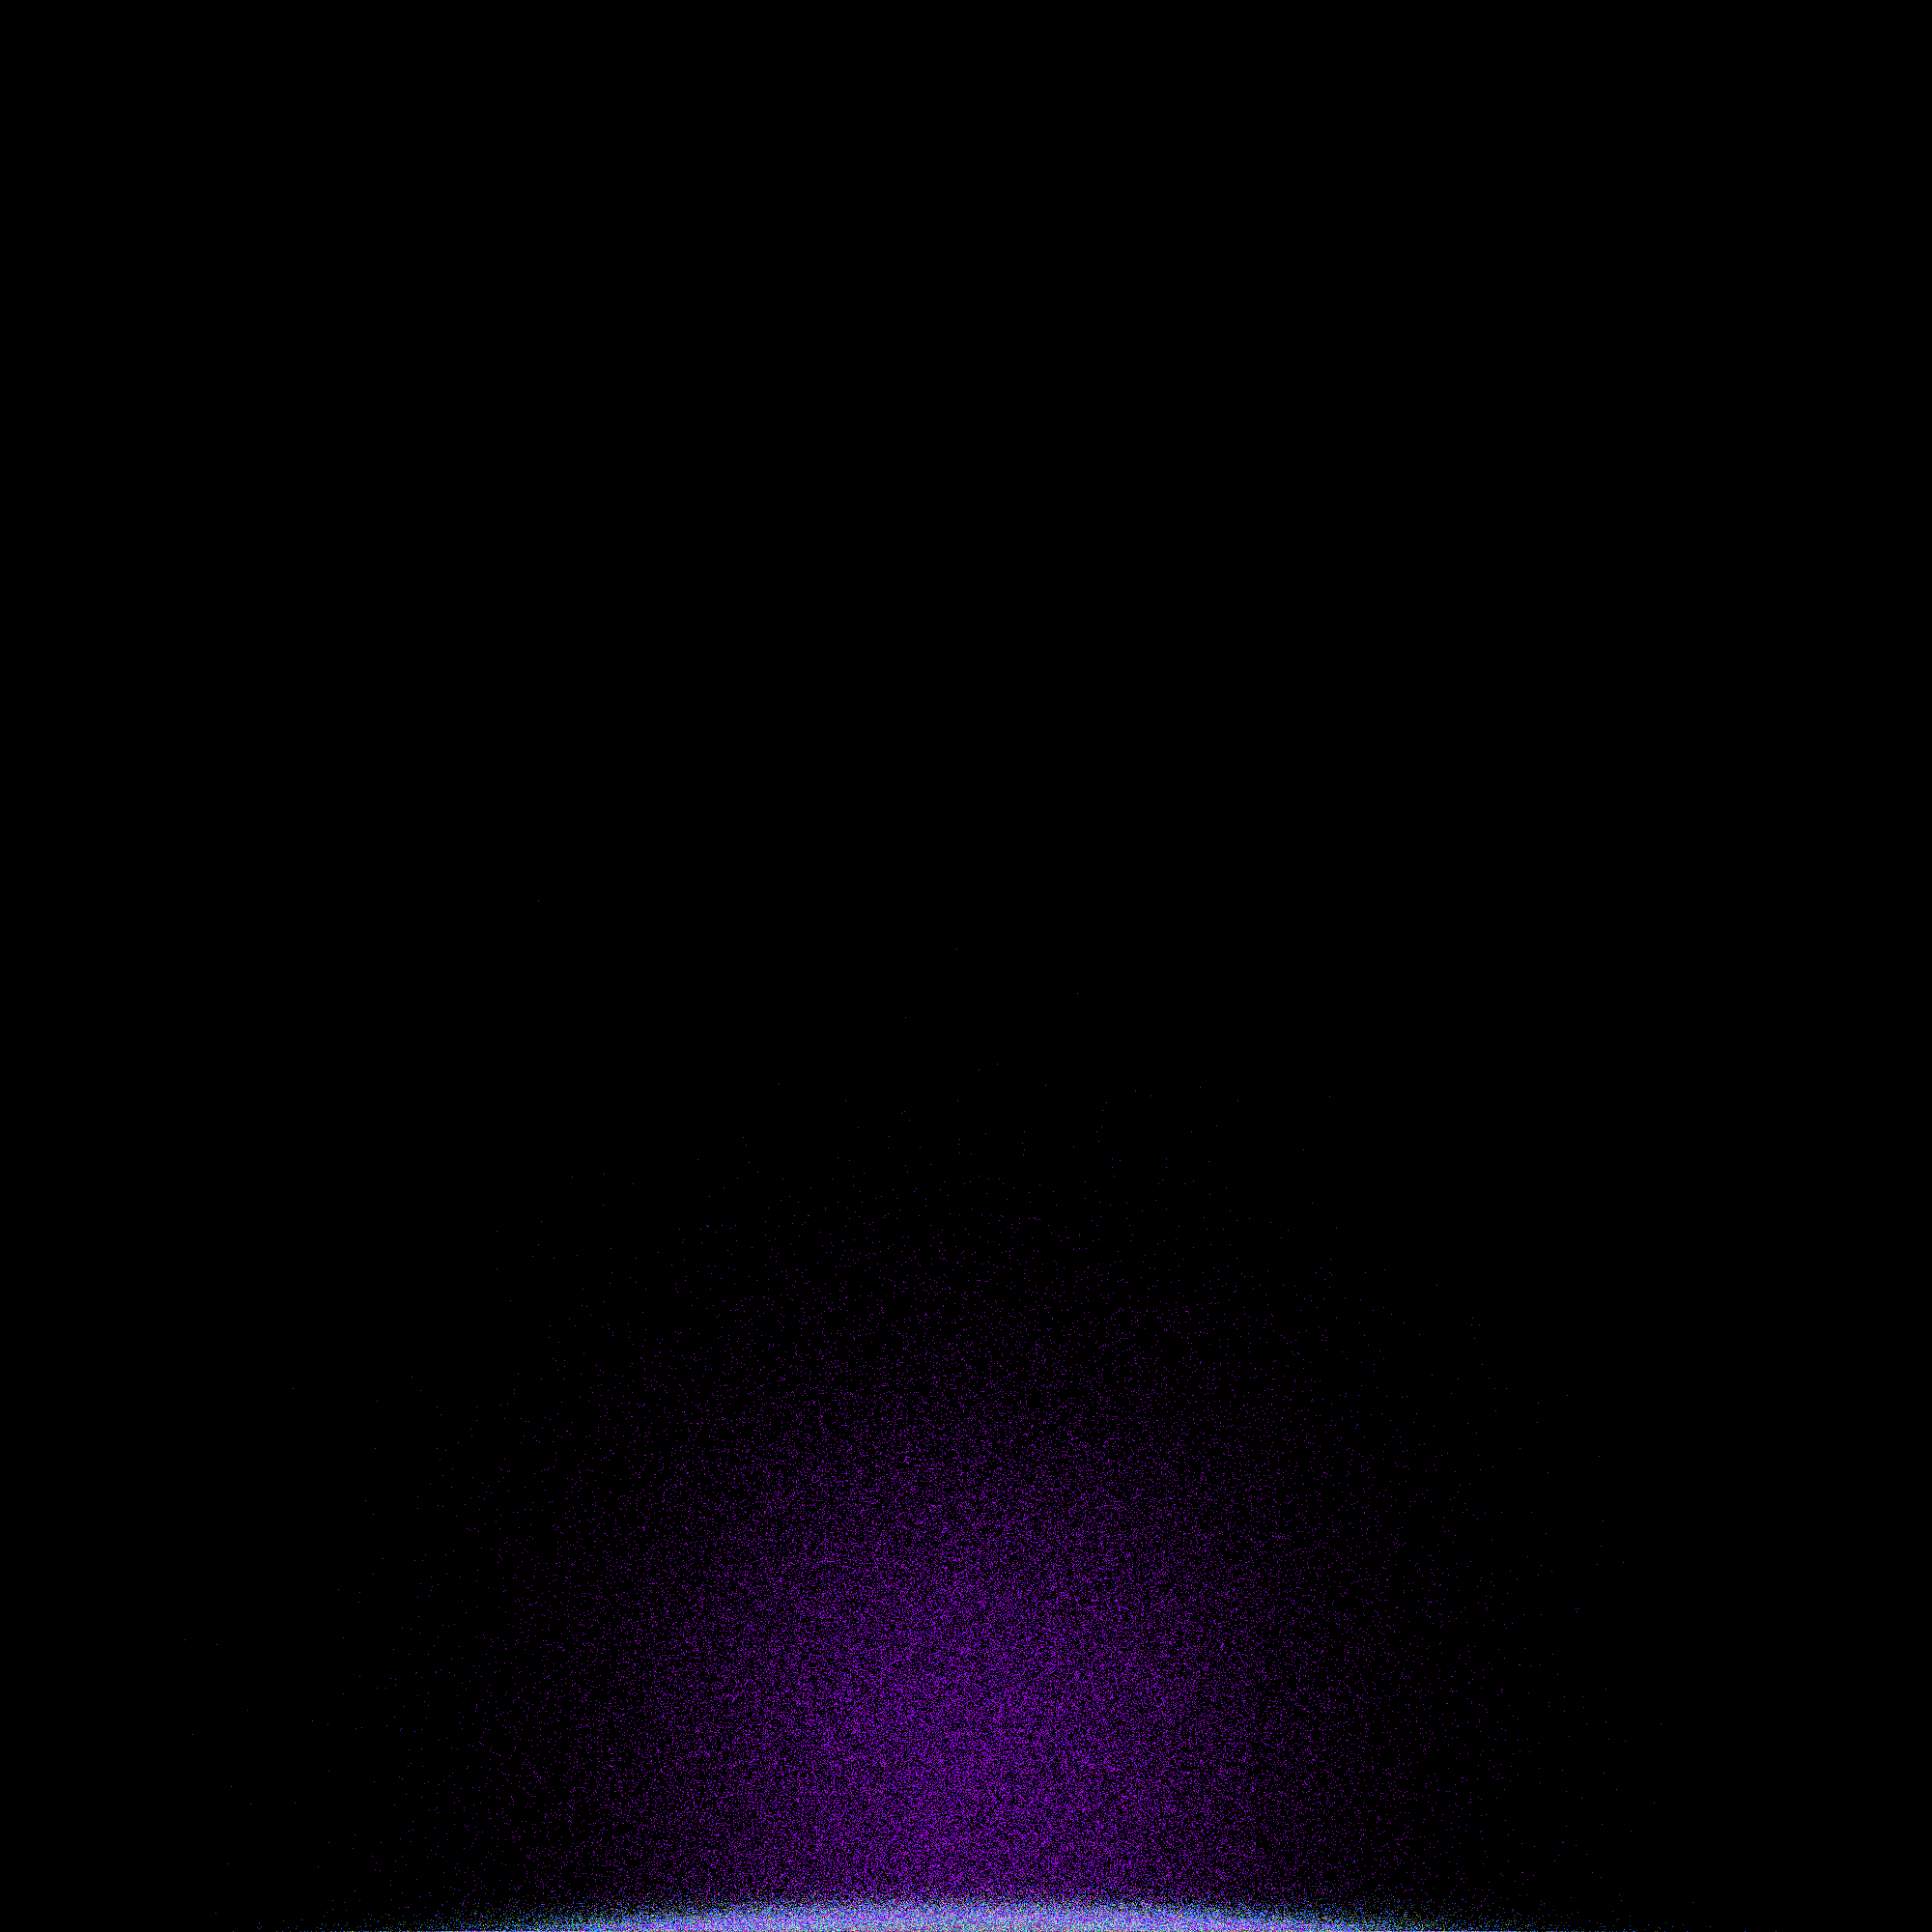

In [ ]:
# combine our bot group data to be rendered
combined_pixels = 0
for pixels in all_pixels:
  combined_pixels += pixels
Image.fromarray(np.flip(combined_pixels, axis=0))

This PIL image shows the ending result  of each "particle" as a pixel, colored to indicate their starting bias. One can very clearly see the weak bias particles clustered in the bottom middle of the image, showing that they aren't strongly affected by the "gravity" effect. However, the other particles with a stronger bias have a very clear clumping around the bottom edge of the image, creating a sort of curve with a peak in the middle. This image shows how a gravity effect can create a sort of atmosphere with a sharp decay in density. We can see on the edge that the particles are so tightly packed that the indivudual colors are hard to distinguish, much like how our atmosphere on Earth has high pressure at sea-level. It's worth noting that these particles do not have collision, so it is not exactly like an atmosphere in that sense. 

###Conclusion
As we see in our Matplot, of our 2-demision 2 walkers and our PIL of the bot walk, we anaylsis different types of movements that random walks can have. In the 2 dimision 2 walkers we found that when two particles start at the same point they are either going to collide in a short time or it will take them a longer time but hardly left no in between. With the PIL of the bot walk we found that when adding the color to the bots it allowed for an easier representation to show the stronger and weaker bias that came from the "gravity" effect. In both the PIL and Matplot we able to ask different types of question for each scenario that was built, and answer those questions through different type of visulations that we were are to create, mark and label.
 